# 게임 제작사에서 신작 비디오 게임을 출시 하려 한다.
- 장르 선정
- 1,2,3 순위로 수출국 선정
- //신작 게임 출시 정보 추천

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [84]:
file_path = '../data/Video Games Sales.csv'

video_games = pd.read_csv(file_path,encoding='UTF-8')

## 데이터 원본 분석

In [119]:
video_games.head(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00


* head 부분 특이사항 없음

In [120]:
video_games.tail(5)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00
1906,1906,1907,WWE SmackDown vs. Raw 2011,X360,2010,Fighting,THQ,0.42,0.32,0.00,0.09,0.83,82.00


* tail 부분 특이 사항 없음

In [87]:
# 데이터 사이즈
video_games.shape

(1907, 13)

* 1907x13 의 데이터 존재

In [88]:
# 데이터 정보
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


* 특이사항 <br>Year 열이 float64 형으로 있다.

### 각 열의 의미
* Rank : 글로벌 매출액 기준 게임 순위
* Game Title : 게임 제목
* Platform : 게임이 발매된 플랫폼
* Year : 게임이 발매된 해
* Genre :  게임의 장르
* Publisher :  게임의 퍼블리셔
* North America : 북미에서의 게임 판매량
* Europe : 유럽에서의 게임 판매
* Japan : 일본에서의 게임 판매량
* Rest of World : 다른 나라에서의 게임 판매량
* Global : 게임의 글로벌 총 매출액입니다
* Review : 게임의 리뷰 점수입니다

---

## 결측치, 이상치 점검
* 누락된 값이 있는지 확인
* 누락된 값을 다른 방식으로 표현하고 있는지도 확인. 예) -, NA, N/A 등
* 이상치 점검. 
예) 수치형 데이터중 특이한 min, max값, 수치형 데이터에서 정규분포를 이루는 데이터중 Outlier, 선형데이터상에 중간에 빈 데이터

In [89]:
video_games.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

* Year열과 Publisher에 결측치 확인

In [90]:
video_games['Publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'Unknown', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment', 'Level 5',
       nan, 'MTV Games', 'Codemasters', 'id Software',
       'Havas Interactive', 'Majesco Entertainment', 'Midway Games',
       'Hudson Soft', 'JVC', 'Valve Software', '989 Studios', 'Maxis',
       'Square EA', 'Tecmo Koei', 'Gotham Games', 'Deep Silver',
       'Infogrames', 'Arena Entertainment', 'Mindscape', 'Banpresto',
       'NCSoft

* Publisher 열의 목록을 확인하여 'NaN', '-', 'N/A'등의 다른 결측치를 찾기 위해 고유값을 찾아 확인한다

In [91]:
video_games.query('Publisher == "Unknown" or Platform =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
253,253,254,RollerCoaster Tycoon,PC,NaN,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
286,286,287,WWF SmackDown!,PS,2000.0,Fighting,Unknown,2.01,1.35,0.06,0.16,3.58,81.00
301,301,302,FIFA Soccer 2004,PS2,NaN,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
524,524,525,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
582,582,583,Call of Duty 3,Wii,NaN,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
746,746,747,Gran Turismo Concept 2001 Tokyo,PS2,NaN,Racing,Unknown,0.00,1.10,0.42,0.33,1.84,80.00
1275,1275,1276,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22,81.00
1424,1424,1425,Rock Band,PS2,NaN,Misc,Unknown,0.71,0.30,0.00,0.11,1.11,82.00
1631,1631,1632,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98,87.00
1676,1676,1677,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95,55.00


* 확인결과 Unknown 이라는 결측치가 확인되어 찾아주었다

---

* 처리 방안<br>
    dropna()를 이용해서 결측치를 drop 시킨다.
* 처리 이유<br>
    년도와 출판사 모두 알수 없는 값일 경우 정확한 데이터 산출을 위해 Drop 시킨다.

In [92]:
video_games.dropna(inplace=True)

In [93]:
video_games.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

* null값이 제거된 것을 확인 할 수 있다

In [94]:
video_games.query('Publisher == "Unknown" or Platform =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
286,286,287,WWF SmackDown!,PS,2000.0,Fighting,Unknown,2.01,1.35,0.06,0.16,3.58,81.0


* 남아 있는 Unknown 데이터 1건 확인
* Google 엔진을 이용하여 검색 결과 Publisher

In [95]:
video_games.Publisher.unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'Unknown', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment', 'Level 5',
       'MTV Games', 'Codemasters', 'id Software', 'Havas Interactive',
       'Majesco Entertainment', 'Midway Games', 'Hudson Soft', 'JVC',
       'Valve Software', '989 Studios', 'Maxis', 'Square EA',
       'Tecmo Koei', 'Gotham Games', 'Deep Silver', 'Infogrames',
       'Arena Entertainment', 'Mindscape', 'Banpresto', 'NCSoft',
       'C

* 더 정확한 근거를 찾기 위해 'Publisher' 의 리스트를 도출한 결과 'THQ' 를 확인할 수 있었다.

In [96]:
video_games.loc[286,'Publisher'] = 'THQ'

* 해당 데이터는 정확한 값을 넣을 수 있으므로 Unique로 일치하는 데이터 확인 후 데이터 직접 삽입으로 처리.

In [97]:
video_games.query('Publisher == "Unknown" or Platform =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review


* 마지막으로 확인

---

#### 출시년도 데이터 int타입으로 변환

In [98]:
video_games['Year'] = video_games['Year'].astype('int64')

In [99]:
video_games.sort_values(by='Year',ascending=True)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
559,559,560,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28,91.00
597,597,598,Mahjong,NES,1983,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14,80.00
1438,1438,1439,Popeye,NES,1983,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10,68.00
1398,1398,1399,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13,77.00
1428,1428,1429,Donkey Kong Jr.,NES,1983,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1565,1566,One Piece Pirate Musou,PS3,2012,Action,Namco Bandai Games,0.00,0.12,0.86,0.04,1.02,78.00
360,360,361,Diablo III,PC,2012,Role-Playing,Activision,1.56,1.09,0.00,0.40,3.05,87.64
136,136,137,Just Dance 4,Wii,2012,Misc,Ubisoft,3.03,1.78,0.00,0.51,5.32,57.00
438,438,439,Mass Effect 3,X360,2012,Role-Playing,Electronic Arts,1.73,0.69,0.03,0.25,2.70,92.17


---

# 탐색적 데이터 분석

## 1차 탐색적 분석

### 유저 리뷰 점수가 가장 높은 퍼블리셔 확인

In [104]:
# 퍼블리셔 평균 유저점수 정렬
review_Publisher = video_games.groupby('Publisher')['Review'].mean()
review_Publisher.round(1).sort_values(ascending=False)

Publisher
Banpresto                  94.0
Valve Software             93.2
Valve                      91.0
NCSoft                     90.0
Havas Interactive          88.6
                           ... 
TDK Mediactive             49.0
Red Storm Entertainment    48.1
Mindscape                  48.0
Pinnacle                   42.0
Rising Star Games          42.0
Name: Review, Length: 93, dtype: float64

In [111]:
# 유저점수가 가장 높은 게임명
review_Publisher2 = video_games.groupby('Game Title')['Review'].max()
review_Publisher2.round(1).sort_values(ascending=False)

Game Title
The Legend of Zelda: Ocarina of Time          97.0
The Orange Box                                96.4
Metroid Prime                                 96.4
Tekken 3                                      96.3
Batman: Arkham Asylum                         96.1
                                              ... 
High School Musical 3: Senior Year            35.0
Dora the Explorer: Dora Saves the Mermaids    34.0
High School Musical 2: Work This Out!         33.0
Jillian Michaels' Fitness Ultimatum 2009      31.0
AMF Bowling Pinbusters!                       30.5
Name: Review, Length: 1505, dtype: float64

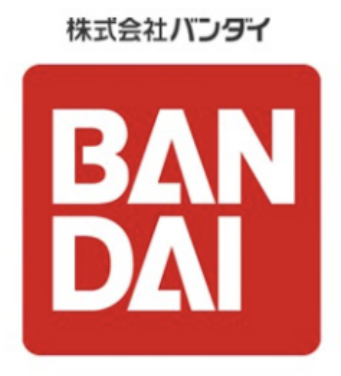

In [112]:
# 가장 높은 점수의 게임 퍼블리셔
find_data = 'The Legend of Zelda: Ocarina of Time'
video_games.loc[video_games['Game Title']==find_data,:] # 1차 분석 리뷰가 가장 높은 게임을 제작한 제작사

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
73,73,74,The Legend of Zelda: Ocarina of Time,N64,1998,Adventure,Nintendo,4.10,1.89,1.45,0.16,7.60,97.0
366,366,367,The Legend of Zelda: Ocarina of Time,3DS,2011,Adventure,Nintendo,1.45,0.79,0.57,0.21,3.02,93.0


### 리뷰점수 평균이 높은 장르

In [121]:
review_genre = video_games.groupby('Genre')['Review'].mean()
df_review_genre = review_genre.sort_values(ascending=False).to_frame()
df_review_genre.reset_index(inplace=True)
df_review_genre 

,Genre,Review
0,Role-Playing,83.918246
1,Strategy,82.320256
2,Fighting,82.138320
3,Adventure,81.646095
4,Shooter,81.149167
5,Action,78.898824
6,Sports,78.822607
7,Platform,78.425968
8,Racing,78.079348
9,Puzzle,74.306818


### 장르별 리뷰 순위

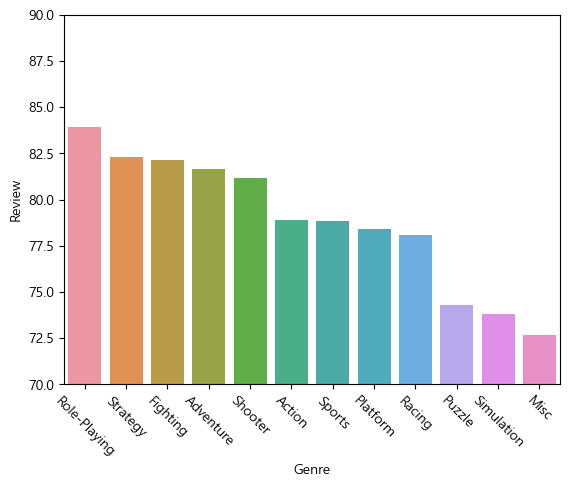

In [114]:
sns.barplot(data=df_review_genre,x="Genre",y="Review")
plt.xticks(rotation=-45)
plt.ylim(70,90)
plt.show()

In [115]:
tmp = video_games.loc[video_games['Year']==2012,:].groupby('Genre')['Review'].mean()
tmp

Genre
Action          77.320000
Adventure       79.570000
Misc            69.150000
Platform        78.400000
Racing          76.396667
Role-Playing    88.112857
Shooter         81.676250
Sports          74.244286
Name: Review, dtype: float64

In [116]:
video_games.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


### 북미에서 흥행한 장르 차트시각화

In [117]:
northAmerica_genre = video_games.groupby('Genre')['North America'].count()
northAmerica_genre.sort_values(inplace=True)

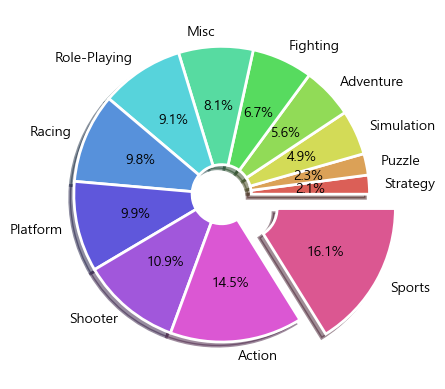

In [118]:
colors = sns.color_palette('hls',len(northAmerica_genre))
explode = (0, 0, 0, 0, 0, 0,0,0,0,0,0,0.2)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.pie(northAmerica_genre, labels=northAmerica_genre.index ,autopct='%.1f%%', shadow=True, colors=colors,explode=explode,wedgeprops=wedgeprops)
plt.show()